In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
sns.set_style('darkgrid')
import warnings
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import imageio
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# First part

In [130]:
ODI = pd.read_csv('ODI-2020.csv', sep=None)
ODI.columns=['major','machine','infor','statistics'
             ,'database','gender','choco','birthday','neighbors','stand','stress','money','random','bed','good1','good2']

In [131]:
def test_filter(k):
    str = k
    str_list = str.split()
    return (str_list)

In [132]:
ODI

,major,machine,infor,statistics,database,gender,choco,birthday,neighbors,stand,stress,money,random,bed,good1,good2
0,Computational Science,no,unknown,mu,ja,female,fat,05-08-1998,0,no,0.0,4,227,22:30,Good weather,Sporting
1,Quantitative Risk Management,no,0,mu,nee,male,unknown,1996,2,no,85.0,25,65,23:05,chill,coffee
2,MSc Computational Science,no,0,mu,ja,female,neither,12th June,4,no,50.0,10,3,10pm,Waking up early and preparing for the day by p...,Using the early morning time to study
3,MSc Finance - QRM,no,0,mu,nee,female,neither,19-06-1994,0,no,10.0,99,2,23,eating good food,spending time with friends
4,BA,yes,0,mu,ja,male,neither,29-09-1993,0,no,60.0,80,7,22:00,Sun is shining,Intimate contact with friends and family
5,Business Analytics,yes,1,mu,ja,male,fat,11-09,0,no,0.0,10,6,23:20,sun,full agenda
6,DHPQRM,no,0,mu,nee,female,neither,27.08.1996,0,no,71.0,10,4,0:35,coffee chat with a friend,jogging in sunny weather
7,Computer Science master,no,0,mu,ja,male,I have no idea what you are talking about,15/03/1992,>100,no,10.0,the amount of money you want to distribute/the...,256,00:35,Enough sleep,No rain
8,BA,yes,0,mu,ja,female,neither,31-08-1998,2,no,0.0,50,3,23:30,Friends,Being productive
9,Master Business Administration: Digital Busine...,no,0,sigma,nee,male,fat,07-11-1995,1,no,22.0,"Based on 500 students: €0,20",8,23,Done a workout,Wake up early


In [122]:
ODI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 16 columns):
major         280 non-null object
machine       280 non-null object
infor         280 non-null object
statistics    280 non-null object
database      280 non-null object
gender        280 non-null object
choco         280 non-null object
birthday      280 non-null object
neighbors     280 non-null object
stand         280 non-null object
stress        280 non-null object
money         280 non-null object
random        280 non-null object
bed           278 non-null object
good1         280 non-null object
good2         280 non-null object
dtypes: object(16)
memory usage: 35.1+ KB


In [75]:
ODI.gender.value_counts(normalize=True)

male       0.564286
female     0.421429
unknown    0.014286
Name: gender, dtype: float64

In [76]:
ODI.infor.value_counts(normalize=True)

0          0.671429
1          0.282143
unknown    0.046429
Name: infor, dtype: float64

In [77]:
ODI.machine.value_counts(normalize=True)

yes        0.635714
no         0.353571
unknown    0.010714
Name: machine, dtype: float64

In [78]:
ODI.statistics.value_counts(normalize=True)

mu         0.860714
sigma      0.096429
unknown    0.042857
Name: statistics, dtype: float64

In [79]:
ODI.database.value_counts(normalize=True)

ja         0.514286
nee        0.464286
unknown    0.021429
Name: database, dtype: float64

In [83]:
string=('Machine','Information','statistics','database')
knownothing=(0.353571,0.282143, 0.096429,0.464286)

Text(0.5, 1.0, 'We know nothing')

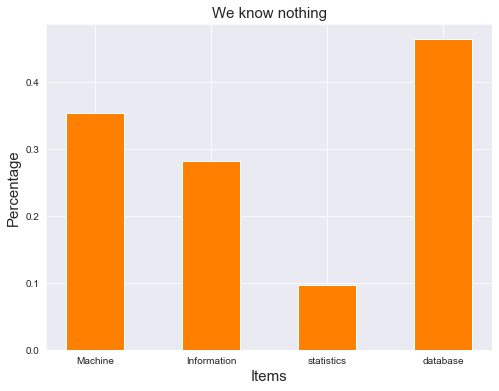

In [98]:
plt.figure(figsize=(8,6))
plt.bar(string,knownothing,width=0.5,color='#ff8000')
plt.xlabel('Items',size=15)
plt.ylabel('Percentage',size=15)
plt.title('We know nothing',size=15)

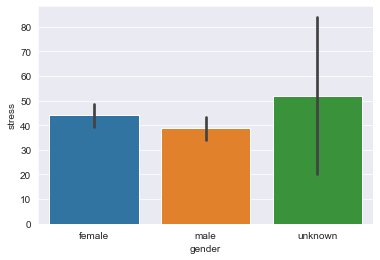

In [136]:
def convert_currency(value):
    new_value = value.replace('0,5', ' 1').replace('8-100','50 ').replace('-','0')
    return np.float(new_value)

# ODI['stress'].apply(convert_currency)

ODI['stress'] = ODI['stress'].astype('float')

stresslist=[ODI['stress'][i] for i in range(len(ODI['stress']))]

sns.barplot(ODI['gender'],ODI['stress'])

In [104]:
ODI['stress'][0]

'0'

([<matplotlib.patches.Wedge at 0x1a162fe748>,
 [Text(0.5057955603938474, -1.5179495548554551, 'male'),
  Text(-0.573388943037229, 1.4937285965002645, 'female'),
  Text(1.3483533773779541, 0.86136123067704, 'unknow')],
 [Text(0.37934667029538555, -1.1384621661415912, '56.43%'),
  Text(-0.4300417072779217, 1.1202964473751982, '42.14%'),
  Text(1.0112650330334654, 0.6460209230077799, '1.43%')])

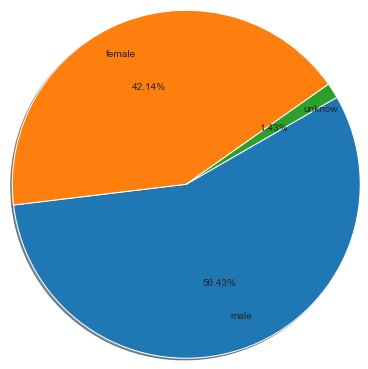

In [67]:
plt.pie(ODI.gender.value_counts(),labels=['male','female','unknow'],autopct='%1.2f%%',shadow=True,labeldistance=0.8,startangle=30,radius=2,counterclock=False)

In [129]:
#class_mapping = {'no':0, 'yes':1,'unknow':2}
#ODI['stand'] = ODI['stand'].map(class_mapping)

# wordcolud

In [24]:
goodlist=[]
for i in range(len(ODI['good1'])):
    goodlist.append(ODI['good1'][i])
    goodlist.append(ODI['good2'][i])
def test_filter(k):
    str = k
    str_list = str.split()
    return (str_list)

In [43]:
cloud=[]
for i in range(len(goodlist)):
    h=test_filter(goodlist[i])
    for k in h:
        cloud.append(k)
mk = imageio.imread("miner.jpg")

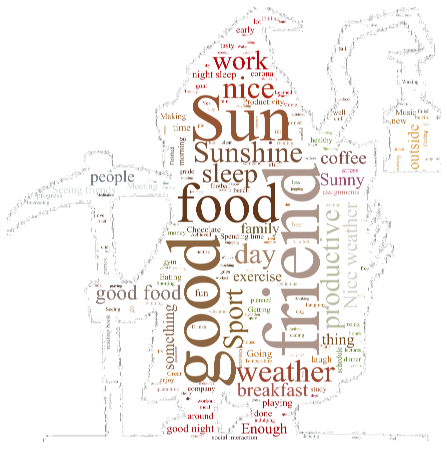

In [61]:
unique_string=(" ").join(cloud)
wordcloud = WordCloud(width=1000,
                        height=700,
                        mask=mk,
                      font_path='./TimesNewRoman.ttf',
                      background_color='white',
                      contour_width=3, contour_color='black',
                        scale=15).generate(unique_string)
image_colors = ImageColorGenerator(mk)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
# plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()

# 1.2

In [4]:
import nltk
from nltk.corpus import movie_reviews

# Loading movie review

In [5]:
df_movie=pd.DataFrame(columns = ['Number','Attitute','Content','Score']) 
df_movie['Number']=np.arange(0,2000,1)
df_movie.loc[np.arange(0,1000,1),'Attitute']=0
df_movie.loc[np.arange(1000,2000,1),'Attitute']=1

In [6]:
import os
import codecs
import glob
os.getcwd()
os.chdir('/Users/hernando/Desktop/NLP/NLP_tech_module1/SentimentExperiment/review_polarity_data/neg')

def txtcombine(df):
    
    files = glob.glob('*.txt')
    z=0
    for filename in files:
        kkk=open(filename,'r')
        url=kkk.read().replace('\n','') 
        df.loc[z, 'Content'] = url
        kkk.close()
        z=z+1
txtcombine(df_movie)
os.getcwd()
os.chdir('/Users/hernando/Desktop/NLP/NLP_tech_module1/SentimentExperiment/review_polarity_data/pos')

def txtcombine_2(df):
    
    files = glob.glob('*.txt')
    z=1000
    for filename in files:
        kkk=open(filename,'r')
        url=kkk.read().replace('\n','') 
        df.loc[z, 'Content'] = url
        kkk.close()
        z=z+1
txtcombine_2(df_movie)

In [7]:
df_movie.head()

,Number,Attitute,Content,Score
0,0,0,bad . bad . bad . that one word seems to prett...,NaN
1,1,0,isn't it the ultimate sign of a movie's cinema...,NaN
2,2,0,""" gordy "" is not a movie , it is a 90-minute-...",NaN
3,3,0,disconnect the phone line . don't accept the c...,NaN
4,4,0,when robert forster found himself famous again...,NaN


# LogisticRegression training

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_movie.Content.values, df_movie.Attitute.values,
                                                    stratify=df_movie.Attitute.values, test_size=0.2,
                                                    random_state=50)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


def create(reviews, labels):
    vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
    training_vec = vector.fit_transform(reviews)
    classifier = LogisticRegression()
    classifier.fit(training_vec, labels)
    return vector,classifier

def pre(evaluation_reviews,vectorizer, sentiment_classifier):
    evaluation_vector = vectorizer.transform(evaluation_reviews)
    predictions = sentiment_classifier.predict(evaluation_vector)
#     score = sentiment_classifier.score(predictions,evn_true)

    return predictions

In [10]:
vectorizer, myclassifier=create(X_train, y_train)
predictions=pre(X_test,vectorizer, myclassifier)

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1_score(predictions,y_test)

0.8528678304239402

# cross

In [486]:
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score   
# kfold = sklearn.model_selection.KFold(n_splits=10)
# vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
# for train, test in kfold.split(df_movie.Content.values):
#     classifier = LogisticRegression() 
#     training_vec = vector.fit_transform(df_movie.Content.values[train])
#     clf=classifier.fit(training_vec,df_movie.Attitute[train])
#     evaluation_vector = vector.transform(df_movie.Content.values[test])
#     print(clf.score(evaluation_vector, df_movie.Attitute[test]))

# LinearSVC

In [70]:
from sklearn import svm
kfold = sklearn.model_selection.KFold(n_splits=10)
vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
classifier0 = svm.LinearSVC() 
training_vec = vector.fit_transform(df_movie.Content.values)
cross_val_score(classifier0, training_vec, df_movie.Attitute.values, cv=kfold)

array([0.82 , 0.82 , 0.79 , 0.78 , 0.825, 0.79 , 0.845, 0.785, 0.8  ,
       0.75 ])

# LogisticRegression

In [69]:
kfold = sklearn.model_selection.KFold(n_splits=10)
vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
classifier1 = LogisticRegression() 
training_vec = vector.fit_transform(df_movie.Content.values)
cross_val_score(classifier1, training_vec, df_movie.Attitute.values, cv=kfold)

array([0.815, 0.82 , 0.77 , 0.805, 0.845, 0.81 , 0.83 , 0.795, 0.81 ,
       0.785])

# GaussianNB

In [67]:
from sklearn.naive_bayes import GaussianNB
kfold = sklearn.model_selection.KFold(n_splits=10)
vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
training_vec = vector.fit_transform(df_movie.Content.values)
classifier2 = GaussianNB() 
cross_val_score(classifier2, training_vec.toarray(), df_movie.Attitute.values, cv=kfold)

array([0.505, 0.48 , 0.44 , 0.535, 0.56 , 0.63 , 0.635, 0.65 , 0.6  ,
       0.645])

# Part2

In [399]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [492]:
test_222 = pd.read_csv('./titanic/test.csv')
PassengerId=test_222['PassengerId']

In [5]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['PassengerId']
test_ID = test['PassengerId']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (891, 12) 
The test data size before dropping Id feature is : (418, 11) 

The train data size after dropping Id feature is : (891, 11) 
The test data size after dropping Id feature is : (418, 10) 


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 32.7+ KB


In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Survived.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 10)


In [9]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
Cabin,77.463713
Age,20.091673
Embarked,0.152788
Fare,0.076394


Text(0.5, 1.0, 'Percent missing data by feature')

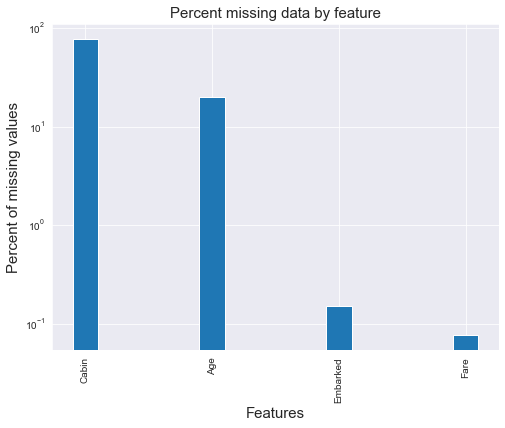

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='90')
plt.bar(x=all_data_na.index, height=all_data_na,width=0.2)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.yscale('log')
plt.title('Percent missing data by feature', fontsize=15)

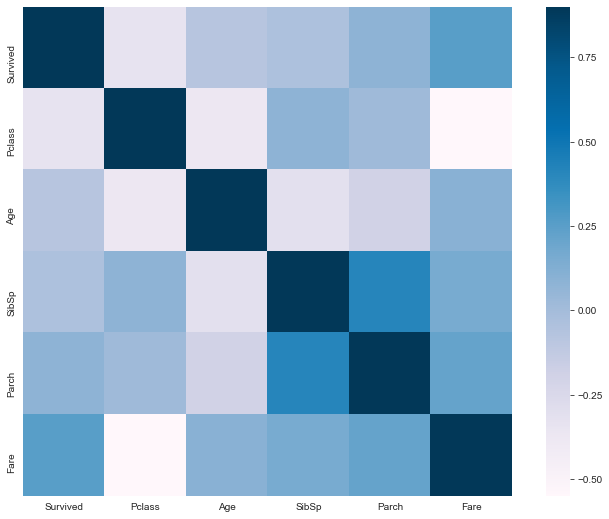

In [11]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap='PuBu')

Text(0.5, 0, 'Sex')

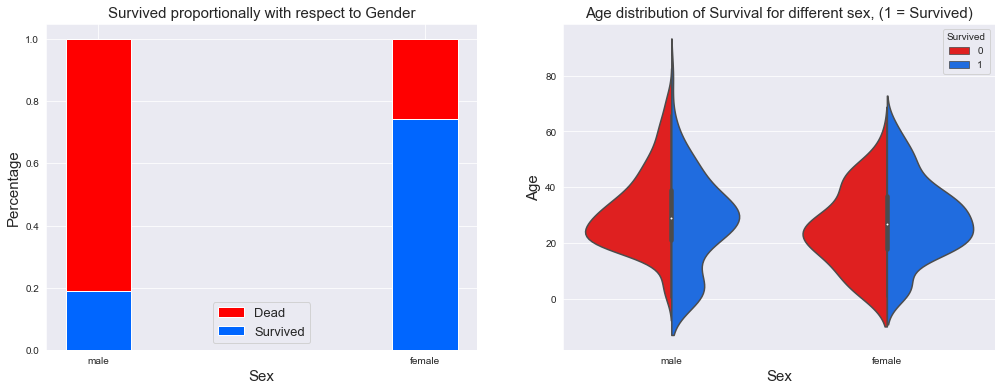

In [133]:
fig = plt.figure(figsize=(17,6))
df_dead = train.Survived[train.Sex == 'male'].value_counts().sort_index()
df_alived = train.Survived[train.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
plt.bar(['male','female'],[1,1],width=0.2,color="#ff0000",label='Dead')
plt.bar(['male','female'],malesvi,width=0.2,color="#0066ff",label='Survived')
plt.title("Survived proportionally with respect to Gender",size=15)
plt.legend(fontsize=13,loc='best') 
plt.ylabel('Percentage',size=15)
plt.xlabel('Sex',size=15)
# #adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
plt.title("Age distribution of Survival for different sex, (1 = Survived)",size=15)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train,split=True,palette={0: "#ff0000", 1: "#0066ff"})
plt.ylabel('Age',size=15)
plt.xlabel('Sex',size=15)

Text(0.5, 1.0, 'Age Distribution within classes')

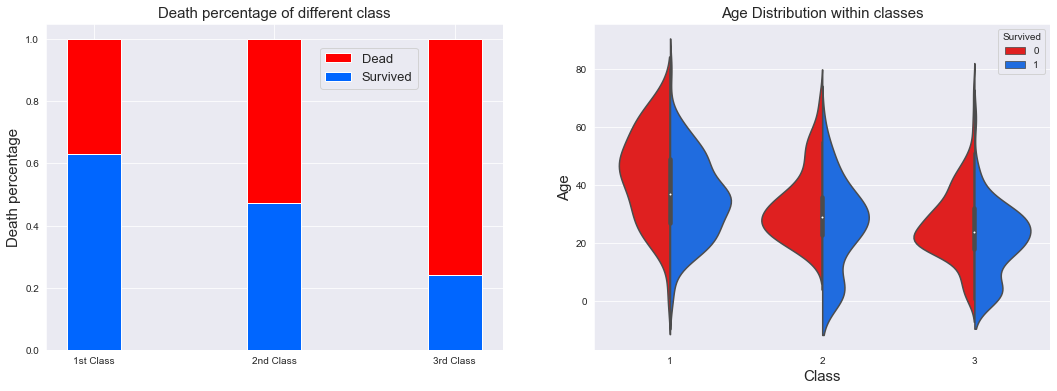

In [230]:
fig = plt.figure(figsize=(18,6))
# plots a kernel density estimate of the subset of the 1st class passangers's age
ax1 = fig.add_subplot(121)
df_3 = train.Survived[train.Pclass == 3].value_counts(normalize=True)[1]
df_2 = train.Survived[train.Pclass == 2].value_counts(normalize=True)[1]
df_1 = train.Survived[train.Pclass == 1].value_counts(normalize=True)[1]
plt.bar(['1st Class', '2nd Class','3rd Class'],[1,1,1],width=0.3,color='#ff0000',label='Dead')
plt.bar(['1st Class', '2nd Class','3rd Class'],[df_1,df_2,df_3],width=0.3,color='#0066ff',label='Survived')
plt.title('Death percentage of different class',size=15)
plt.ylabel('Death percentage',size=15)
plt.legend(fontsize=13,loc=(0.6,0.8))

ax1 = fig.add_subplot(122)

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train,split=True,palette={0: "#ff0000", 1: "#0066ff"})
plt.xlabel("Class",size=15) 
plt.ylabel("Age",size=15) 
plt.title("Age Distribution within classes",size=15)

Text(0.5, 1.0, 'How umber of siblings influence the survived rate')

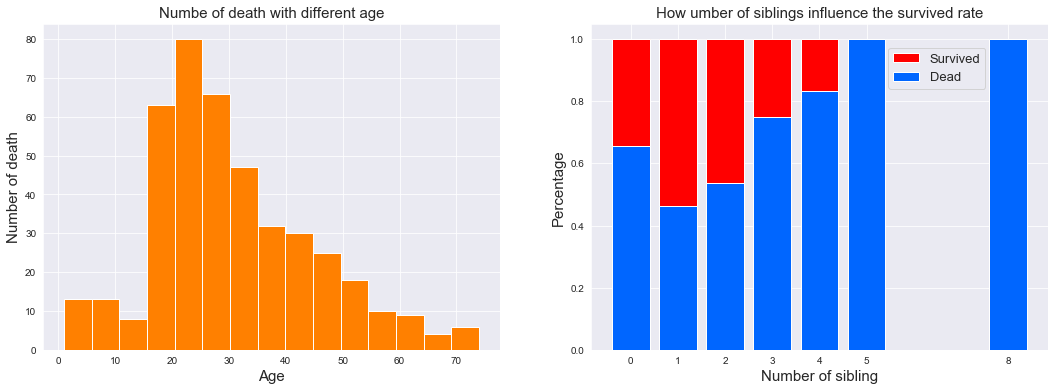

In [239]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
plt.title('Numbe of death with different age',size=15)
plt.hist(train.Age[train.Survived == 0],color='#ff8000',bins=15)
plt.xlabel("Age",size=15) 
plt.ylabel("Number of death",size=15) 
ax1 = fig.add_subplot(122)
plt.bar([0,1,2,3,4,5,8],[1,1,1,1,1,1,1],color='#ff0000',label='Survived')
plt.bar([0,1,2,3,4,5,8],list1,color='#0066ff',label='Dead')
plt.xticks([0,1,2,3,4,5,8])
plt.xlabel('Number of sibling',size=15)
plt.ylabel('Percentage',size=15)
plt.legend(fontsize=13,loc=(0.65,0.8))
plt.title('How umber of siblings influence the survived rate',size=15)

# Combine data

In [402]:
target = train.Survived

In [403]:
train.drop(['Survived'], 1, inplace=True)

In [404]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [405]:
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['index','PassengerId'], inplace=True, axis=1)

In [406]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# mapping sex 

In [365]:
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

# Cabin

In [407]:
combined.loc[combined.Cabin.isnull(), 'Cabin'] = 'U'
for i in range(len(combined.Cabin)):
    if combined.Cabin[i] != 'U':
        combined.Cabin[i]=combined.Cabin[i][0]

# Split title

In [459]:
combined['Split'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [460]:
combined['Split'] = combined['Split'].replace(['Mme','Ms'],'Mrs')
combined['Split'] = combined['Split'].replace(['Mlle'],'Miss')
combined['Split'] = combined['Split'].replace(['Don', 'Sir', 'the Countess', 'Dona', 'Lady','Jonkheer'],'Roy')
combined['Split'] = combined['Split'].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt',''],'Stuff')
combined['Split'] = combined['Split'].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt',''],'Stuff')

# Embark

In [408]:
combined[combined.Embarked.isnull().values==True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


In [409]:
# combined['Embarked'].fillna('S',inplace=True)
combined['Embarked'].fillna('C',inplace=True)

# Family

In [436]:
combined['Fam']=combined['SibSp']+combined['Parch']+1


In [438]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) or (s == 1):
        return 1
    else:
        return 0

In [440]:
Fam_Co = dict(combined['Fam'].value_counts())
combined['Fam_con']=combined['Fam'].apply((Fam_label))

In [441]:
combined['Fam_con'].value_counts()

1    853
2    437
0     19
Name: Fam_con, dtype: int64

# Fare

In [446]:
combined['Fare'].fillna(combined[(combined['Embarked'] == 'S') & (combined['Pclass'] == 1)].Fare.median(),inplace=True)

# Age

In [453]:
combined[combined.Age.isnull().values==True]

In [468]:
begin = combined[['Age', 'Pclass','Sex','Split']]
begin  = pd.get_dummies(begin)
ageyes = begin[begin.Age.notnull()].as_matrix()
ageno = begin[begin.Age.isnull()].as_matrix()

In [469]:
from sklearn.ensemble import RandomForestRegressor
y_want = ageyes[:, 0]
X_want = ageyes[:, 1:]
    
random_f = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
random_f.fit(X_want, y_want)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [470]:
predictedAges = random_f.predict(ageno[:, 1::])

In [472]:
combined.loc[ (combined.Age.isnull()), 'Age' ] = predictedAges

# Ticket

In [476]:
Ticket_Co = dict(combined['Ticket'].value_counts())
combined['Ticket_con']=combined['Ticket'].apply(lambda x:Ticket_Co[x])

In [477]:
def Ticket_La(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) or (s == 1):
        return 1
    else:
        return 0

combined['Ticket_con'] = combined['Ticket_con'].apply(Ticket_La)

In [478]:
combined.Ticket_con.value_counts()

1    823
2    475
0     11
Name: Ticket_con, dtype: int64

# Fname

In [395]:
combined['Fname']=combined['Name'].apply(lambda x:x.split(',')[0].strip())

In [479]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam,Fam_con,Split,Ticket_con
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,2,2,Mr,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,2,Mrs,2
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,1,Miss,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,2,Mrs,2
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,1,Mr,1


In [481]:
combined_1=combined[['Pclass','Sex','Age','Fare','Embarked','Cabin','Fam_con','Split','Ticket_con']]

In [482]:
combined_1=pd.get_dummies(combined_1)

In [484]:
train_final=combined_1[:891]
test_final=combined_1[891:]

# Result

In [487]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest
# from sklearn import cross_validation, metrics
from sklearn.model_selection import GridSearchCV

In [488]:
pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(train_final,target)
print(gsearch.best_params_, gsearch.best_score_)

/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate

/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate

/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate

/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate

/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate

/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate

/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/hernando/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate

{'classify__max_depth': 9, 'classify__n_estimators': 30} 0.8773738542339585


In [489]:
import warnings
warnings.filterwarnings('ignore')

In [490]:
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 30,
                                  max_depth = 9, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(train_final,target)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x1a38dd2378>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=9,
                                        max_features='sqrt',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=30, n_jobs=None,
                                        oob_score=False, random_state=10,
                                        verbose=0, warm_start=True))],
         verbose=False

In [493]:
predictions = pipeline.predict(test_final)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission.csv", index=False)

# 77%